In [11]:
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, GlobalAveragePooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from time import time
import matplotlib.pyplot as plt
from helper import Helper

In [2]:
h = Helper()

train_it, validation_it, test_it = h.construct_data_generator_w_validation(batch_size=10)

Found 22050 images belonging to 3 classes.
Found 3150 images belonging to 3 classes.
Found 6300 images belonging to 3 classes.


In [3]:
resnet101 = ResNet101(include_top = False, weights=None, input_shape=(224,224,3))

x = resnet101.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
pred = Dense(3, activation='softmax')(x)

model = Model(inputs=resnet101.input, outputs=pred, name='cnn_topomap_classification_model_resnet101')

model.summary()

Model: "cnn_topomap_classification_model_resnet101"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_________________________________________________________

In [4]:
opt = Adam(learning_rate=0.0001)
loss = 'categorical_crossentropy'

model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

In [5]:
tblog_path = h.logs_directory.format(time())
tb_log = TensorBoard(log_dir = tblog_path, profile_batch=0)

ch = ModelCheckpoint('models/resnet101_checkpoints/cnn_cp_topomaps_model_resnet_checkpoint.h5', 
                     monitor='val_accuracy', mode='max', save_best_only=True)
es = EarlyStopping(monitor='val_loss', mode='min', min_delta=0.0001, patience=15)

In [6]:
r = model.fit_generator(train_it, epochs=100, callbacks=[ch,es,tb_log], validation_data=validation_it)

Epoch 1/100
2205/2205 [==============================] - 770s 349ms/step - loss: 1.1964 - accuracy: 0.4373 - val_loss: 1.0132 - val_accuracy: 0.5273
Epoch 2/100
2205/2205 [==============================] - 774s 351ms/step - loss: 0.8560 - accuracy: 0.6159 - val_loss: 0.8166 - val_accuracy: 0.6333
Epoch 3/100
2205/2205 [==============================] - 769s 349ms/step - loss: 0.6645 - accuracy: 0.7140 - val_loss: 0.9162 - val_accuracy: 0.6235
Epoch 4/100
2205/2205 [==============================] - 770s 349ms/step - loss: 0.5391 - accuracy: 0.7771 - val_loss: 0.6094 - val_accuracy: 0.7314
Epoch 5/100
2205/2205 [==============================] - 768s 348ms/step - loss: 0.4573 - accuracy: 0.8112 - val_loss: 0.6185 - val_accuracy: 0.7206
Epoch 6/100
2205/2205 [==============================] - 770s 349ms/step - loss: 0.3812 - accuracy: 0.8473 - val_loss: 0.5384 - val_accuracy: 0.7606
Epoch 7/100
2205/2205 [==============================] - 769s 349ms/step - loss: 0.3322 - accuracy: 0.8670

In [7]:
evaluate = model.evaluate_generator(test_it)

In [8]:
y_prob = model.predict_generator(test_it)

In [9]:
h.save(model, r, evaluate, y_prob, 'cnn_topomap_classification_model_resnet101')

model saved, path: models/cnn_topomap_classification_model_resnet101.h5


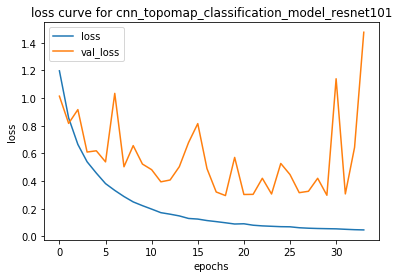

In [12]:
plt.figure()

plt.title('loss curve for cnn_topomap_classification_model_resnet101')

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.savefig('results/loss curve for cnn_topomap_classification_model_resnet101.png')

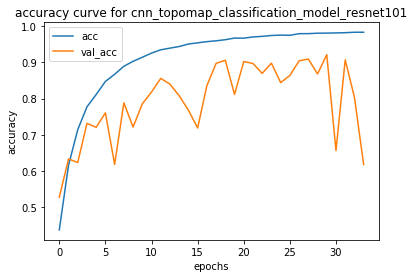

In [13]:
plt.figure()

plt.title('accuracy curve for cnn_topomap_classification_model_resnet101')

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.savefig('results/accuracy curve for cnn_topomap_classification_model_resnet101.png')